<a href="https://colab.research.google.com/github/LuisaBeccar/atenciones_md_laboral/blob/main/USABLE_finochietto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# librerias
%%capture
import pandas as pd
import numpy as np
!pip install catboost
!uname
from sklearn.feature_extraction.text import CountVectorizer
#Spacy
!python -m spacy download es_core_news_sm
import spacy
sp = spacy.load('es_core_news_sm')
import matplotlib.pyplot as plt



##✅  USABLE

In [2]:
dic_ene_24 = input("copie y pegue aqui las observaciones de la planilla 1:")
ene_feb_24 = input("copie y pegue aqui las observaciones de la planilla 2:")
feb_mar_24 = input("copie y pegue aqui las observaciones de la planilla 3:")
mar_abr_24 = input("copie y pegue aqui las observaciones de la planilla 4:")
abr_may_24 = input("copie y pegue aqui las observaciones de la planilla 5:")
may_jun_24 = input("copie y pegue aqui las observaciones de la planilla 6:")
jun_jul_24 = input("copie y pegue aqui las observaciones de la planilla 7:")
jul_ago_24 = input("copie y pegue aqui las observaciones de la planilla 8:")
ago_sept_24 = input("copie y pegue aqui las observaciones de la planilla 9:")
sept_oct_24 = input("copie y pegue aqui las observaciones de la planilla 10:")
oct_nov_24 = input("copie y pegue aqui las observaciones de la planilla 11:")
nov_dic_24 = input("copie y pegue aqui las observaciones de la planilla 12:")
prolongadas_24 = input("copie y pegue aqui las observaciones de la planilla prolongados:")

copie y pegue aqui las observaciones de la planilla 1:
copie y pegue aqui las observaciones de la planilla 2:
copie y pegue aqui las observaciones de la planilla 3:
copie y pegue aqui las observaciones de la planilla 4:
copie y pegue aqui las observaciones de la planilla 5:
copie y pegue aqui las observaciones de la planilla 6:
copie y pegue aqui las observaciones de la planilla 7:
copie y pegue aqui las observaciones de la planilla 8:
copie y pegue aqui las observaciones de la planilla 9:c 16/8 recibo mail con dertificado de gastroenteritis 15/8 reposo 72 hs. cito a ml el lunes 19. // 19/8 Acude a consultorio con certificado 16/8 recibo certificado de ausencia por  extraccion dental, reposo 72hs // 19/8 acude a consultorio para entrega de certificado. Trabaja TN A, en agosto DIAS PARES 16/8 recibo certificado de ausencia por  extraccion dental, reposo 72hs // 19/8 acude a consultorio para entrega de certificado. Trabaja TN A, en agosto DIAS PARES 16/8 recibo certificado 16/8 de influe

In [3]:
periodos = {"ene_feb_24":ene_feb_24,
            "feb_mar_24":feb_mar_24,
            "mar_abr_24":mar_abr_24,
            "abr_may_24":abr_may_24,
            "may_jun_24":may_jun_24,
            "jun_jul_24":jun_jul_24,
            "jul_ago_24":jul_ago_24,
            "ago_sept_24":ago_sept_24,
            "sept_oct_24":sept_oct_24,
            "oct_nov_24":oct_nov_24,
            "nov_dic_24":nov_dic_24,
            "prolongadas_24":prolongadas_24}


In [10]:
# counter unipalabras con quitador de stopwords
from spacy.lang.es import stop_words as es_stop_words
counter1 = CountVectorizer(stop_words= list(es_stop_words.STOP_WORDS))

nombre = []
virt = []
pres = []

for key, periodo in periodos.items():  #dos
  if periodo == "":
    continue
  p = 100  # Number of words per row

  words = periodo.split()
  rows = []
  for i in range(0, len(words), p):
     rows.append(' '.join(words[i:i+p]))
  X = pd.Series(rows)
# X es la serie que resulta de esta funcion y que luego pasara a la otra funcion para analizar texto

#----------
  X_t1 = counter1.fit_transform(X)  # counter_ sin nada, para tokenizar individualmente

  data1 = pd.DataFrame(X_t1.toarray().sum(axis=0),
                    index = counter1.get_feature_names_out(),
                    columns=['freq'])

# -----------------------------------
# para contar binomios quiero las stopwords presentes para poder buscar tipo "se presenta", "se recibe", "se comunica"

  counter2 = CountVectorizer(ngram_range = (2,2))  #an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.

  X_t2 = counter2.fit_transform(X)

  data2 = pd.DataFrame(X_t2.toarray().sum(axis=0),
             index = counter2.get_feature_names_out(),
             columns = ['freq']).sort_values('freq',ascending=False)


# ------------------

  virtuales = (data2.query('index == "recibo certificado"').sum().iloc[0] +
               data2.query('index == "recibo certificados"').sum().iloc[0] +
               data2.query('index == "recibo certif"').sum().iloc[0] +
               data2.query('index == "recibo email"').sum().iloc[0] +
               data2.query('index == "recibo mail"').sum().iloc[0] +
               data2.query('index == "se recibe"').sum().iloc[0] +
               data2.query('index == "recibo aviso"').sum().iloc[0] +
               data2.query('index == "sector avisa"').sum().iloc[0] +
               data2.query('index == "envia certif"').sum().iloc[0] +
               data2.query('index == "envia certificado"').sum().iloc[0] +
               data2.query('index == "envia certificados"').sum().iloc[0] +
               data2.query('index == "envia constancia"').sum().iloc[0]+
               data2.query('index == "envia mail"').sum().iloc[0]+
               data2.query('index == "envia email"').sum().iloc[0]+
               data2.query('index == "se comunica"').sum().iloc[0] +
               data2.query('index == "sector informa"').sum().iloc[0]  +
               data2.query('index == "me comunico"').sum().iloc[0] +
               data2.query('index == "se comunica"').sum().iloc[0] +
               data1.query('index == "llamo"').sum().iloc[0] +
               data1.query('index == "llama"').sum().iloc[0] +
               data2.query('index == "intento comunicarme"').sum().iloc[0]
              )
# uso data1 sacados los stopwords, mas prolijo para los unipalabra,, pero sin sacarle stopwords (data2) para bipalabras porque necesito el "se"

  presenciales = (data1.query('index == "concurre"').sum().iloc[0] +
                  data1.query('index == "concurrio"').sum().iloc[0] +
                  data1.query('index == "acude"').sum().iloc[0] +
                  data1.query('index == "acudió"').sum().iloc[0] +
                  data2.query('index == "se presenta"').sum().iloc[0]+
                  data2.query('index == "se presentó"').sum().iloc[0]+
                  data1.query('index == "aporta"').sum().iloc[0])

# uso data1 sacados los stopwords, mas prolijo para los unipalabra,, pero sin sacarle stopwords (data2) para bipalabras porque necesito el "se"
    # Append results to the lists
  virt.append(virtuales)
  pres.append(presenciales)
  nombre.append(key)

# Create a DataFrame with the results
  tabla0 = pd.DataFrame({"nombre": nombre,"virtuales": virt,"presenciales": pres}) # para grafico de barras
  tabla = pd.DataFrame({"nombre": nombre,"virtuales": virt,"presenciales": pres}).T
  tabla.columns = tabla.iloc[0]
  tabla = tabla.iloc[1:]

###--- outside the for
display(tabla)


nombre,ago_sept_24,oct_nov_24
virtuales,77,100
presenciales,48,55


# Grafico

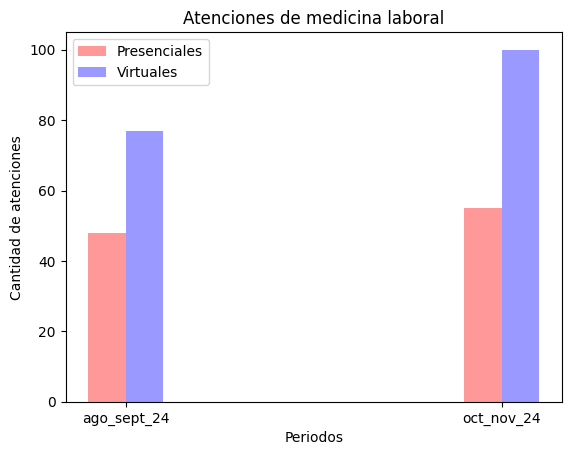

In [16]:
x = range(len(tabla0))  # X-axis positions

# Create grouped bar plot
plt.bar(x, tabla0['presenciales'], width=0.1, color='red', alpha=0.4 , label='Presenciales', align='center')
plt.bar([i + 0.1 for i in x], tabla0['virtuales'], width=0.1, color='blue',alpha=0.4 , label='Virtuales', align='center')

# Add labels, title, and legend
plt.xlabel("Periodos")
plt.ylabel("Cantidad de atenciones")
plt.title("Atenciones de medicina laboral")
plt.xticks([i + 0.05 for i in x], tabla0['nombre'])  # Adjust tick positions
plt.legend()

# Show the plot
plt.show()